In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

# read dataset
file_path = os.path.realpath('../Project/Assets/iris_clean.csv')
iris = pd.read_csv(file_path)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Exploration
#### Since the dataset isn't that large I've already skimmed through the .csv file and seen that there are no missing values. But let's take a quick look at the various values in the dataset nontheless. 

No missing values in any of the columns, confirmed below.

In [2]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Same number of measurements for the three different species.

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Values for the entire dataset above.

Describe function split on species:

In [5]:
for species in iris['species'].unique():
    print(f"{species.capitalize()}:")
    display(iris[iris['species'] == species].describe())

Setosa:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Versicolor:


,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Virginica:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


Looking through the main thing that pops out at me is the Setosa petal length that looks to be significantly lower than the other two species.
But I will continue to look at the data and we will see if any interesting jumps out.

Printing out only the mean values for the species.


In [6]:
for species in iris["species"].unique():
    print(f"Mean values for {species.capitalize()}:\n{iris[iris['species'] == species].mean(numeric_only = True)}\n")

Mean values for Setosa:
sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

Mean values for Versicolor:
sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

Mean values for Virginica:
sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64



## Petal Measurements

Petal Point Distribution:

<Axes: xlabel='petal_width', ylabel='petal_length'>

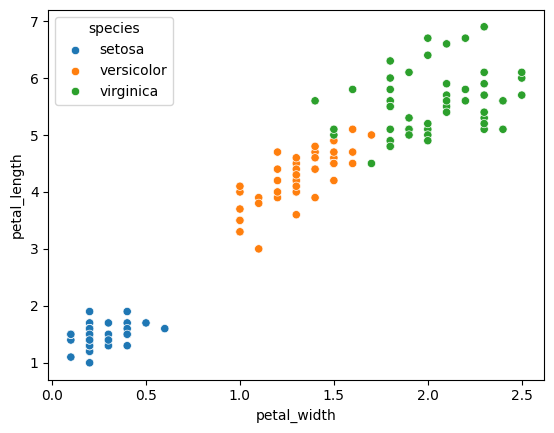

In [7]:
sns.scatterplot(x = 'petal_width', y = 'petal_length', hue = 'species', data = iris)

lmplot to show regression line.

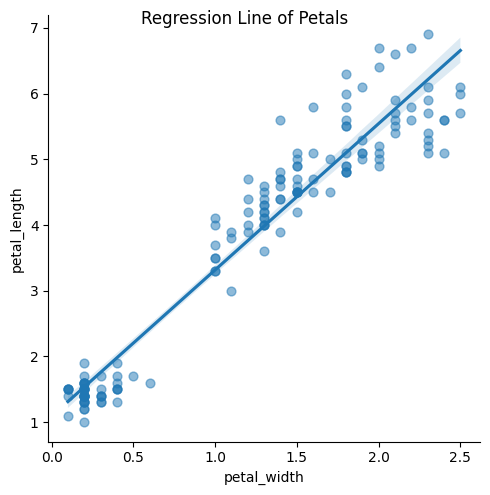

In [8]:
sns.lmplot(x ='petal_width', y ='petal_length', scatter_kws=dict(alpha=0.5, s=40), data = iris)
plt.suptitle("Regression Line of Petals")

plt.show()

It might be better to look at each individual species like the graph below however it seems the correlation is strong. 

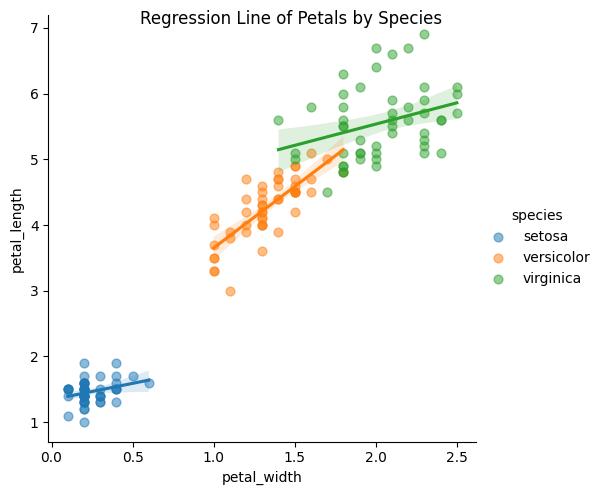

In [9]:
sns.lmplot(x ='petal_width', y ='petal_length', hue ='species', scatter_kws=dict(alpha=0.5, s=40), data = iris)
plt.suptitle("Regression Line of Petals by Species")

plt.show()

## Sepal Measurements

Now let's take a look at Sepal Point Distribution

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

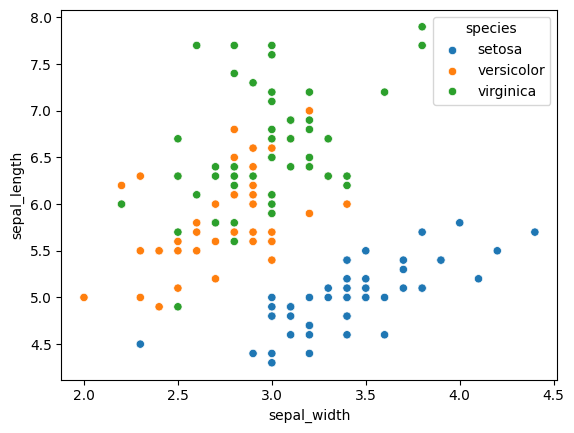

In [10]:
sns.scatterplot(x = 'sepal_width', y = 'sepal_length', hue = 'species', data = iris)

Sepals data is alot more mixed together than the Petals data. So for sepals it makes sence to look at the data based on species, and doing so we can see more clear trends. Especially for setosa.

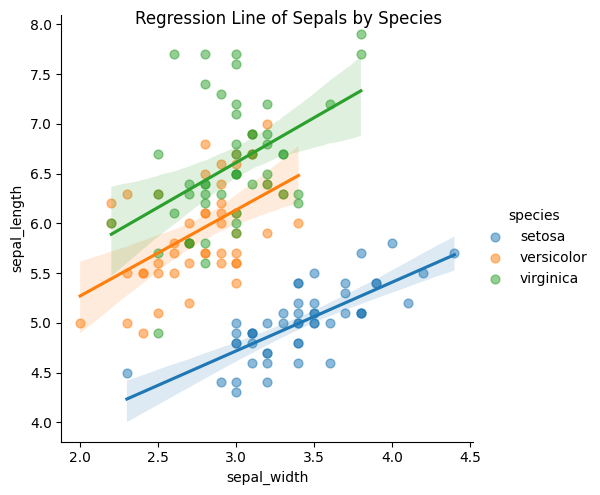

In [11]:
sns.lmplot(x ='sepal_width', y ='sepal_length', hue ='species', scatter_kws=dict(alpha=0.5, s=40), data = iris)
plt.suptitle("Regression Line of Sepals by Species")

plt.show()

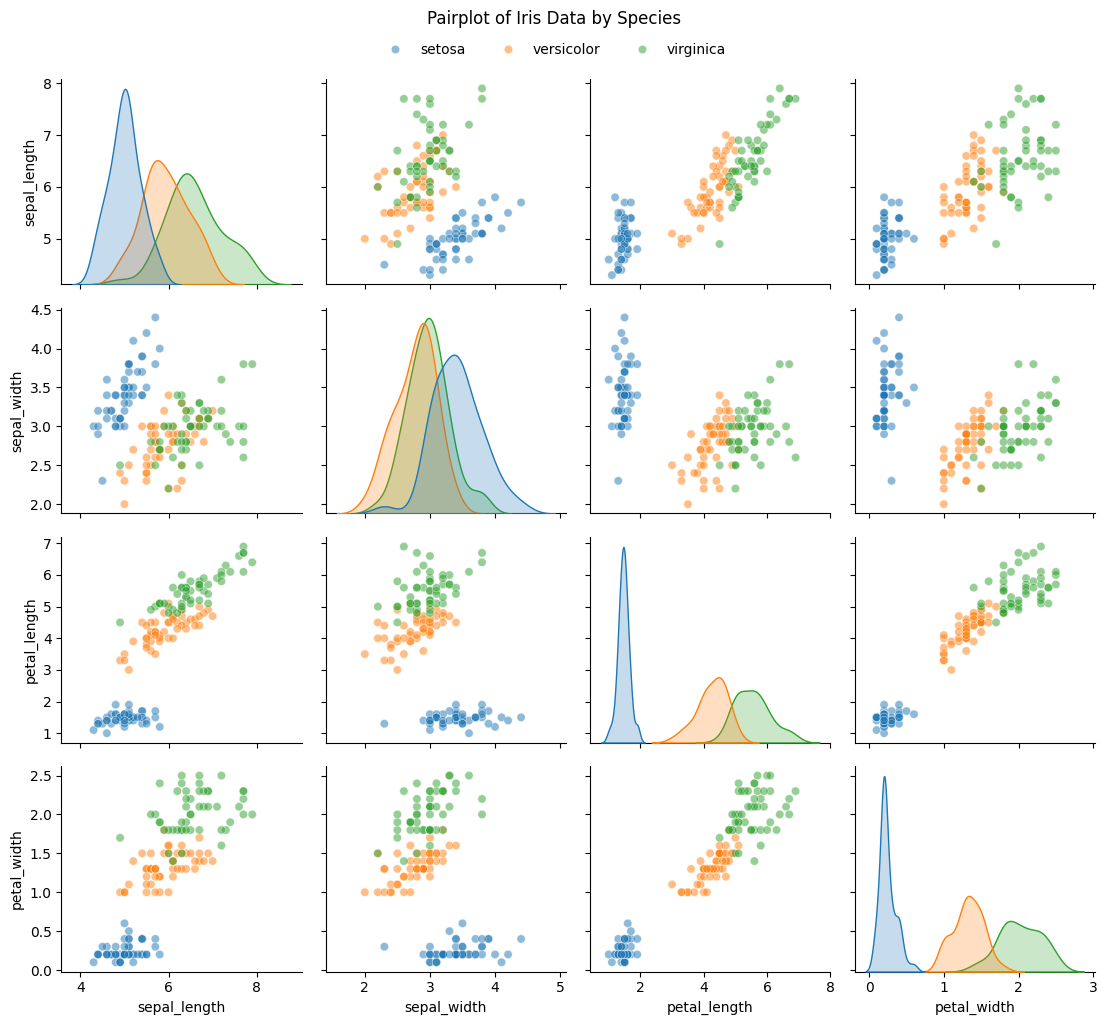

In [12]:
chart = sns.pairplot(iris, hue='species', plot_kws=dict(alpha=0.5))
plt.suptitle("Pairplot of Iris Data by Species", y=1.02)

sns.move_legend(chart, "upper center", bbox_to_anchor=(0.5, 1), ncol=3, title=(""))
plt.tight_layout()

Above is an overview of the dataset. There are some measurements that seem to have very clear correlations, while others seem to have almost none. 

As shown earlier the petal width and length have a strong correlation. 

In the case of Setosa, the petal and sepal measurements seem to be independent while the same measurements for the other two species, Versicolor and Virginica look to have some correlation.

## Correlation heatmap

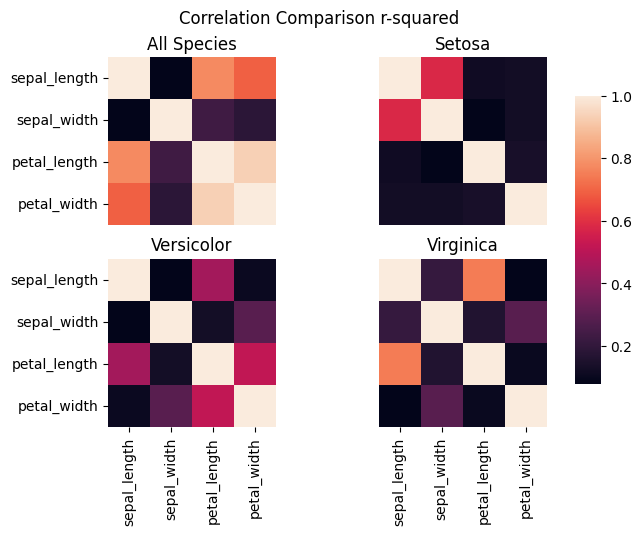

In [30]:

corr = iris.corr(numeric_only=True) # create a correlation matrix of the numeric columns
# create a subset of the dataframe for each species
corr_setosa = iris[iris['species'] == 'setosa'].corr(numeric_only=True) 
corr_versicolor = iris[iris['species'] == 'versicolor'].corr(numeric_only=True) 
corr_virginica = iris[iris['species'] == 'virginica'].corr(numeric_only=True)

fig, axs = plt.subplots(2, 2) # create a figure with a 2x2 grid of Axes
cbar_ax = fig.add_axes([.9, .2, .04, .6]) # add an axes to the right of the figure

fig.suptitle("Correlation Comparison r-squared")

ax = plt.subplot(2, 2, 1) # first plot,top left of grid
sns.heatmap(corr**2, ax= ax, cbar = False, xticklabels=False, )
ax.set_title("All Species")
ax.set_aspect('equal')

ax = plt.subplot(2, 2, 2) # second plot, top right of grid
sns.heatmap(corr_setosa**2, ax=ax, cbar = False, xticklabels=False, yticklabels=False)
ax.set_title("Setosa")
ax.set_aspect('equal')

ax = plt.subplot(2, 2, 3) # third plot, bot left of grid
sns.heatmap(corr_versicolor**2, ax=ax, cbar = False)
ax.set_title("Versicolor")
ax.set_aspect('equal')

ax = plt.subplot(2, 2, 4) # fourth plot, bot right of grid
sns.heatmap(corr_virginica**2, ax=ax, cbar_ax=cbar_ax, yticklabels=False) # add colorbar to fourth plot
ax.set_title("Virginica")
ax.set_aspect('equal')

plt.show()

The heatmap plot above is for r-squared meaning that the values will be between 0-1 where a higher number means a larger correlation. 

#### Petal correlation test to determine r and p value

Using bivariate correlation due to it being 2 compared variables

In [34]:
r, p = stats.pearsonr(iris['petal_length'], iris['petal_width']) # calculate r and p values PETAL
print(f"r = {round(r, 4):.4f}, p = {round(p, 4):.4f}") # print r and p values  

r = 0.9628, p = 0.0000


#### Sepal correlation test to determine r and p value

Using bivariate correlation due to it being 2 compared variables

In [35]:
r, p = stats.pearsonr(iris['sepal_length'], iris['sepal_width']) # calculate r and p values SEPAL
print(f"r = {round(r, 4):.4f}, p = {round(p, 4):.4f}") # print r and p values

r = -0.1094, p = 0.1828


#### Linear Regression

Using ordinary least squares

In [36]:
model = ols('petal_length ~ petal_width', data=iris).fit() # create a model of petal length and petal width
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           5.78e-86
Time:                        15:35:52   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0906      0.073     14.951      

This can be used for predictions

In [38]:
ypred = model.predict(iris['petal_width']) # create a series of predicted values for petal length
ypred

0      1.535749
1      1.535749
2      1.535749
3      1.535749
4      1.535749
         ...   
145    6.210108
146    5.319754
147    5.542343
148    6.210108
149    5.097166
Length: 150, dtype: float64

Now going to plot these predictions

And we can clearly see that the predicted values lines up with the regplot regression line.

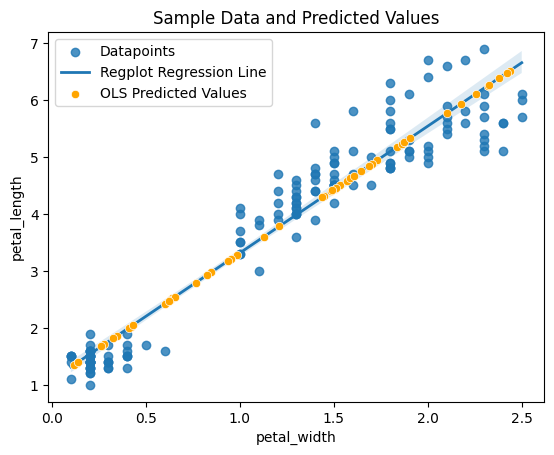

In [51]:
# create a dataframe of 50 random values between the min and max of petal width (inside min-max range of iris-data)
random_points = pd.DataFrame(np.random.uniform(min(iris['petal_width']), max(iris['petal_width']), size=(50,1)), columns=['petal_width'])

# create a series of predicted values for petal length using the random points
ypred = model.predict(random_points)

# plotting the Iris dataset and regression line
sns.regplot(iris,
            x = 'petal_width',
            y = 'petal_length',
            label='Datapoints', 
            line_kws=dict(linewidth=2, label="Regplot Regression Line"))

plt.title("Sample Data and Predicted Values")

# plotting predicted values on top of random points, with a different color
sns.scatterplot(x=random_points['petal_width'], y=ypred, color='orange', label='OLS Predicted Values', 
                zorder= 10) # zorder to plot on top of the regplot

plt.show()